In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
f = open("month.csv")
righe = f.readlines()
d = {"mese":[], "temperature":[], "data":[]}
#righe

In [4]:
for elemento in righe:
    lista = elemento[:-1].split(",")
    if "9999.9" not in lista[9]:
        d["temperature"].append(float(lista[9]))
        d["mese"].append(int(lista[0].split("-")[1]))
        d["data"].append(lista[0])

for nome, dati in d.items():
    d[nome] = np.array(dati)
d

{'mese': array([ 1,  1,  1, ..., 12, 12, 12]),
 'temperature': array([ 1.3,  1.3,  1.4, ..., -3.9, -4.5, -4.5]),
 'data': array(['01-01-2010', '01-01-2010', '01-01-2010', ..., '31-12-2010',
        '31-12-2010', '31-12-2010'], dtype='<U10')}

In [5]:
def estrai_temperature(mese):
    return(d["temperature"][d["mese"] == mese])

In [6]:
cols = 1
rows = 12
nomi_mesi = ["Gennaio", "Febbraio", "Marzo", "Aprile", "Maggio", "Giugno",
            "Luglio", "Agosto", "Settembre", "Ottobre", "Novembre", "Dicembre"]

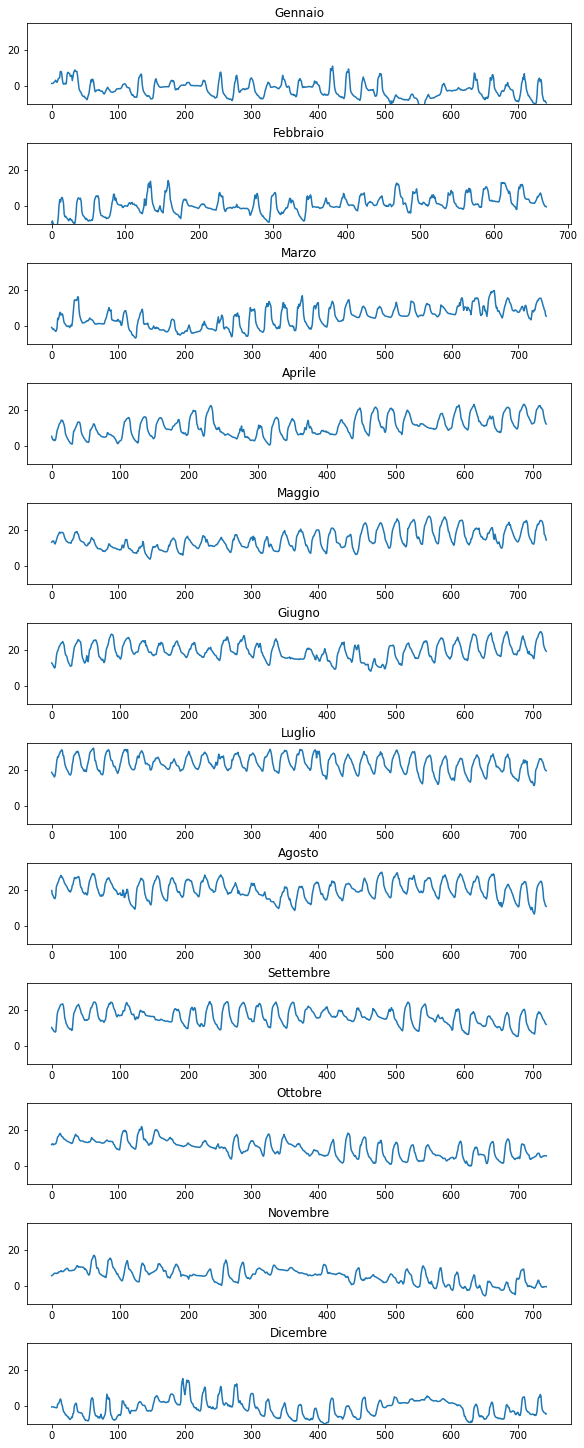

In [7]:
h = 0
mese = 1
fig, axs = plt.subplots(rows, cols, figsize=(8,20), layout ="constrained")
for i in range(rows):
    axs[i].plot(estrai_temperature(i+1))
    axs[i].set_title(nomi_mesi[i])
    axs[i].set_ylim([-10, 35])
plt.show()

In [33]:
indici_giorni_32 = np.max(d["temperature"])==d["temperature"]

In [36]:
d["data"][indici_giorni_32]

array(['03-07-2010'], dtype='<U10')

In [43]:
temperature, luglio = estrai_temperature_date(7)
np.min(temperature)

11.2

In [45]:
luglio[temperature==11.2]

array(['31-07-2010'], dtype='<U10')

In [47]:
np.mean(estrai_temperature(8))

20.149193548387096

In [62]:
mese = []
for i in range(12):
    mese.append(np.mean(estrai_temperature(i+1)))
mese = np.array(mese)
np.min(mese)
nomi_mesi = np.array(nomi_mesi)
#np.min(mese)==mese
nomi_mesi[np.min(mese)==mese]

array(['Gennaio'], dtype='<U9')

In [64]:
nomi_mesi[np.argmin(mese)]

'Gennaio'

In [70]:
temperature = estrai_temperature(7)
np.logical_and(np.roll(temperature, -1)<temperature, np.roll(temperature, 1)>temperature)

array([18.6, 17.9, 17.3, 16.9, 30.8, 28. , 27.8, 25.1, 22.8, 21.9, 20.8,
       20. , 19.5, 18.6, 17.8, 17.3, 29.8, 28.4, 26.9, 25.5, 22.8, 21.7,
       21.2, 20.5, 19.6, 19.2, 29. , 25.1, 25. , 23.1, 21.7, 20.1, 19.9,
       18.6, 17.7, 17.5, 31. , 29.6, 27.1, 25.4, 25.2, 25. , 23.3, 22.1,
       20.7, 19.7, 19.1, 31.1, 27.7, 24.2, 22.7, 22.1, 21.1, 20.7, 20.2,
       27.4, 30.1, 29.4, 28.2, 26.6, 25. , 23.3, 22.8, 22.7, 22.5, 20. ,
       26.1, 25.2, 24.1, 23.4, 23. , 22.6, 22.2, 22. , 21.6, 21. , 20.8,
       20.4, 25. , 24.2, 23. , 22.4, 22.3, 22.1, 21.7, 20.7, 29.4, 28. ,
       27.4, 26.3, 25. , 23.9, 23. , 22.3, 21.6, 21. , 29.1, 29. , 28.2,
       27.2, 25.9, 24.4, 23.8, 23.7, 23. , 22.9, 21.1, 26.8, 25.3, 22.7,
       21.8, 21.1, 20.4, 19.7, 27.6, 27.4, 26.4, 24.8, 23.5, 22.2, 21.6,
       20.9, 20.6, 19.6, 29. , 28.4, 27.7, 26.9, 25.2, 24. , 23.5, 22.8,
       22. , 21.8, 21.3, 20.7, 20.1, 19.4, 30.6, 28.9, 26.6, 23.6, 22.3,
       20.4, 19.5, 19.1, 30.3, 29. , 27. , 25.6, 24

In [41]:
def estrai_temperature_date(mese):
    return d["temperature"][d["mese"] == mese], d["data"][d["mese"] == mese]

In [42]:
estrai_temperature_date(7)

(array([18.6, 17.9, 17.3, 16.9, 16. , 16.7, 19.1, 22.7, 25.6, 27.2, 27.1,
        28.5, 28.9, 30.1, 30.4, 31.1, 30.8, 28. , 27.8, 25.1, 22.8, 21.9,
        20.8, 20. , 19.5, 18.6, 17.8, 17.3, 17.1, 17.7, 19.6, 23. , 24.7,
        27.5, 28.1, 28.8, 28.9, 30. , 29.7, 30.3, 29.8, 28.4, 26.9, 25.5,
        22.8, 21.7, 21.2, 20.5, 19.6, 19.2, 20. , 19.2, 19. , 21.3, 22.9,
        24.4, 26.2, 28.9, 30. , 30.3, 30.9, 31.3, 31.8, 32. , 29. , 25.1,
        25. , 23.1, 21.7, 20.1, 19.9, 19.2, 19.7, 18.6, 17.7, 17.5, 17.2,
        17.6, 20. , 24.1, 27. , 28.5, 29.6, 30.4, 30.4, 31.1, 31. , 29.6,
        27.1, 25.4, 25.2, 25. , 23.3, 22.1, 21.8, 21.9, 20.7, 19.7, 19.1,
        18. , 18.8, 19.9, 21.3, 23.3, 24.6, 26.7, 27.8, 29.4, 29.9, 31.1,
        30.9, 31.3, 31.1, 30. , 31.2, 27.7, 24.2, 22.7, 22.1, 21.1, 20.7,
        20.2, 20. , 20.1, 20.1, 20.7, 22.7, 23.6, 25.9, 27.6, 27.4, 26.6,
        28.5, 29.4, 29.8, 30.6, 30.1, 29.4, 28.2, 26.6, 25. , 23.2, 23.5,
        23.6, 23.3, 22.8, 22.7, 22.5, 